# import data

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

def parser(x):
    return datetime.strptime(x,'%Y-%m')

macro = pd.read_excel('/Users/xiangyujie/Desktop/pwc/Macro.xlsx',index_col=0,parse_dates=[0])
macro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2018-01-01 to 2020-06-01
Data columns (total 20 columns):
TrafficTurnover_Home         30 non-null float64
TrafficTurnover_Abroad       30 non-null float64
TrafficTurnover_Total        30 non-null float64
PassengerVolume_Home         30 non-null float64
PassengerVolume_Abroad       30 non-null float64
PassengerVolume_Total        30 non-null float64
PassengerTurnover_Home       30 non-null float64
PassengerTurnover_Abroad     30 non-null float64
PassengerTurnover_Total      30 non-null float64
PassengerLoadFactor          30 non-null float64
PassengerThroughput_E        30 non-null float64
PassengerThroughput_M        30 non-null float64
PassengerThroughput_W        30 non-null float64
PassengerThroughput_NE       30 non-null float64
PassengerThroughput_Total    30 non-null float64
FlightMovements_E            30 non-null float64
FlightMovements_M            30 non-null float64
FlightMovements_W            30 non-null flo

# Choose the model 

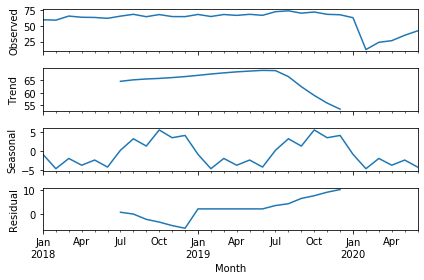

<Figure size 1080x504 with 0 Axes>

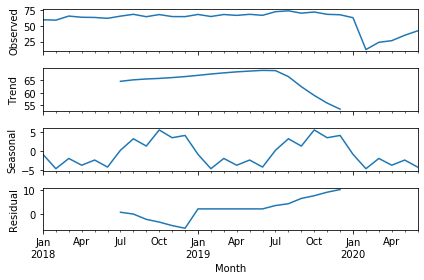

In [268]:
df_train = macro[['TrafficTurnover_Home']]
plt.figure(figsize=[15, 7])
sm.tsa.seasonal_decompose(df_train).plot()

## Parameters setting and pick the best model

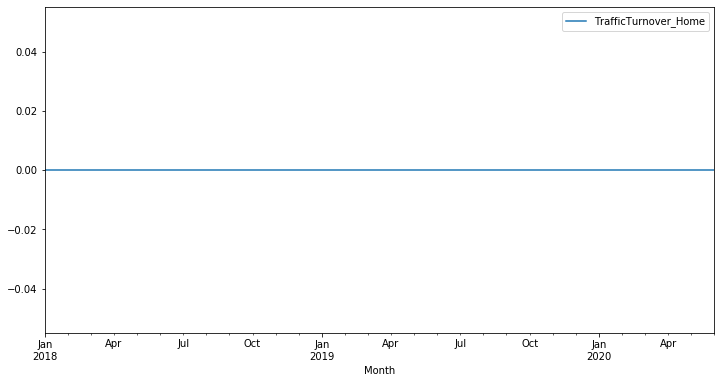

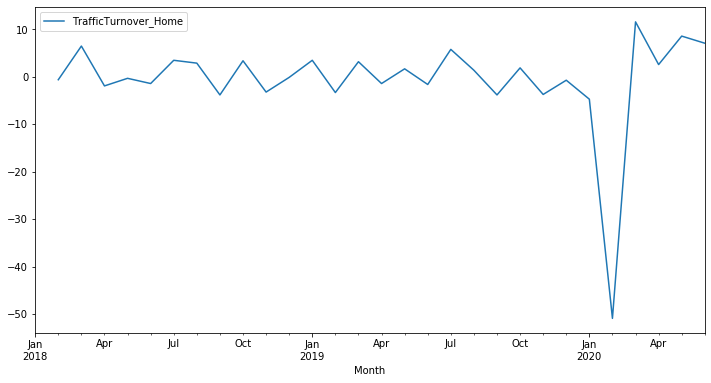

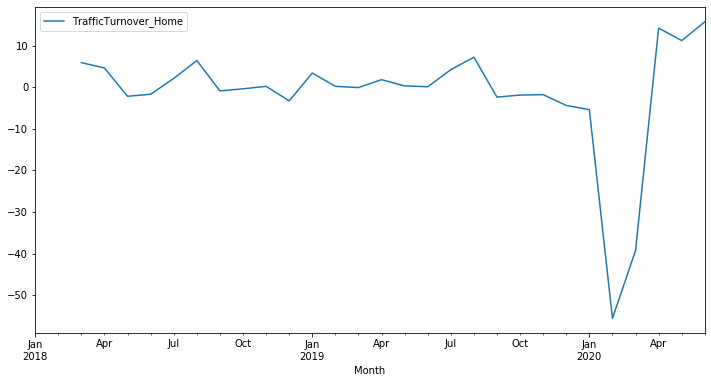

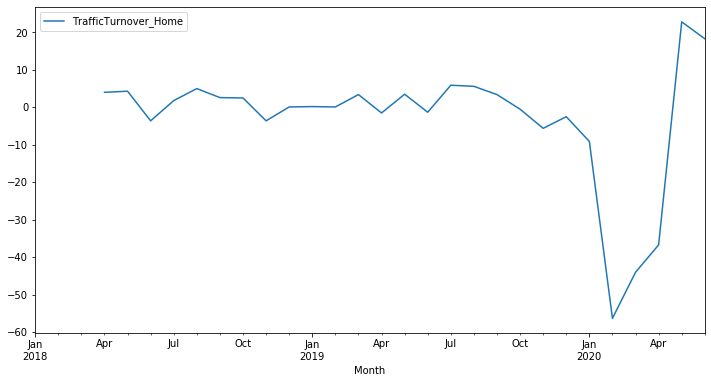

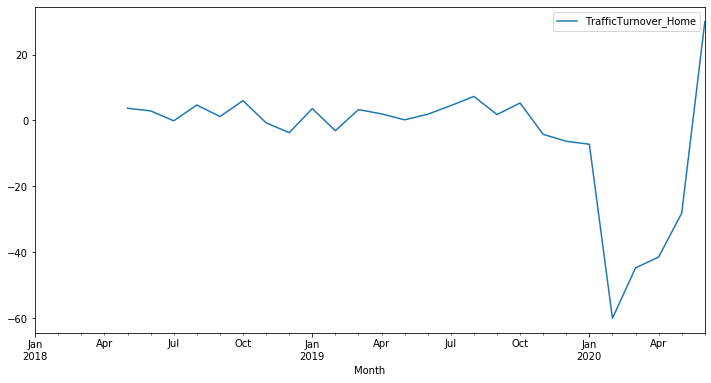

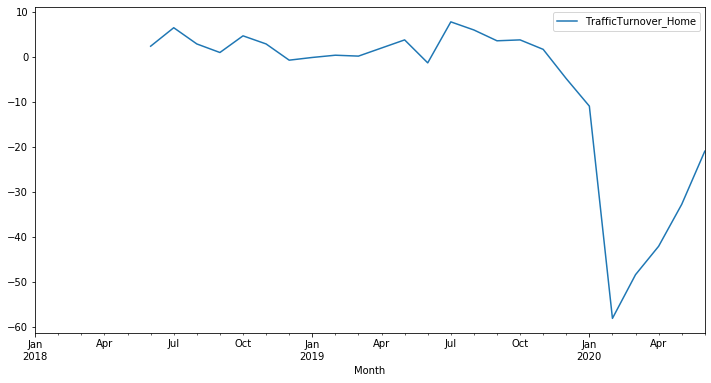

In [276]:
for i in range(6):
    diff = df_train.diff(i)
    diff.plot(figsize=(12,6))

In [270]:
ps = range(4, 6)
qs = range(4, 6)
Ps = range(0, 2)
Qs = range(0, 2)
d = 1
D = 1

from itertools import product 
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
# list参数列表
print('parameters_list:{}'.format(parameters_list))
print(len(parameters_list))

results = []
best_aic = float("inf")

for parameters in parameters_list:
    try:
        # SARIMAX 训练的时候用到转换之后的ts
        model = sm.tsa.statespace.SARIMAX(df_train, order=(parameters[0], d, parameters[1]),
                                          seasonal_factor=(parameters[2], D, parameters[3], 12)).fit()
    except ValueError:
        print('wrong parameters:', parameters)
        continue

    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = parameters
    results.append([parameters, model.aic])

parameters_list:[(4, 4, 0, 0), (4, 4, 0, 1), (4, 4, 1, 0), (4, 4, 1, 1), (4, 5, 0, 0), (4, 5, 0, 1), (4, 5, 1, 0), (4, 5, 1, 1), (5, 4, 0, 0), (5, 4, 0, 1), (5, 4, 1, 0), (5, 4, 1, 1), (5, 5, 0, 0), (5, 5, 0, 1), (5, 5, 1, 0), (5, 5, 1, 1)]
16


/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information wa

In [271]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by='aic', ascending=True).head())
print(best_model.summary())

     parameters         aic
0  (4, 4, 0, 0)  232.697319
1  (4, 4, 0, 1)  232.697319
2  (4, 4, 1, 0)  232.697319
3  (4, 4, 1, 1)  232.697319
8  (5, 4, 0, 0)  233.456779
                            Statespace Model Results                            
Dep. Variable:     TrafficTurnover_Home   No. Observations:                   30
Model:                 SARIMAX(4, 1, 4)   Log Likelihood                -107.349
Date:                  Mon, 27 Jul 2020   AIC                            232.697
Time:                          19:22:18   BIC                            245.003
Sample:                      01-01-2018   HQIC                           236.551
                           - 06-01-2020                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6597     

## Diagnostics of the model

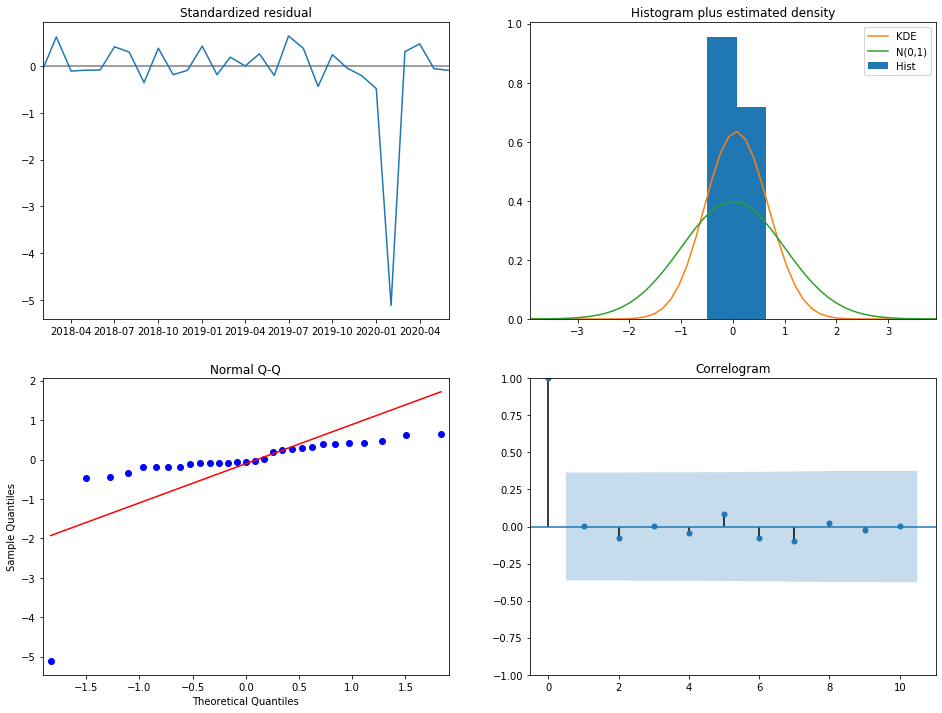

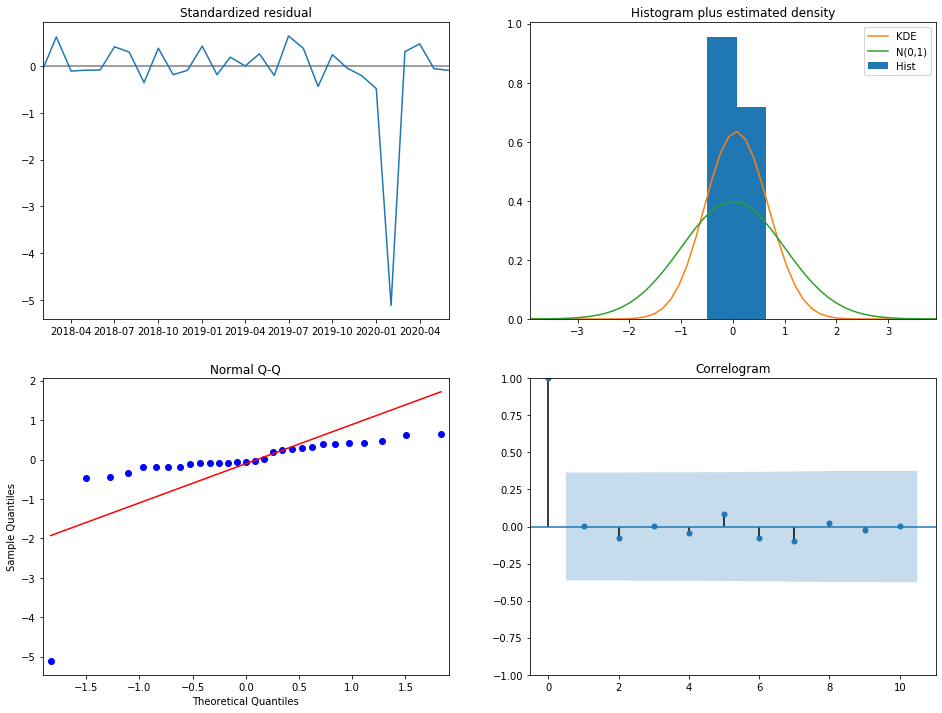

In [272]:
best_model.plot_diagnostics( figsize=(16, 12))

### ACF 

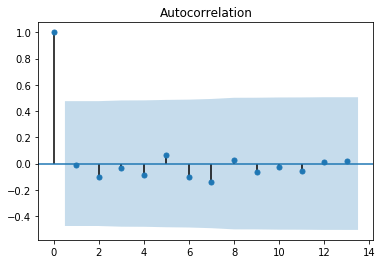

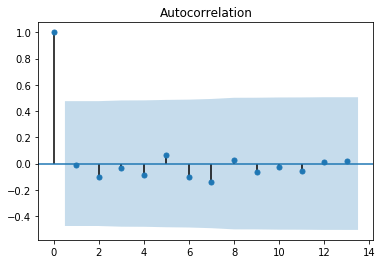

In [273]:
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze())

# Predict Macro

## Traffic Turnover quick peek

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood o

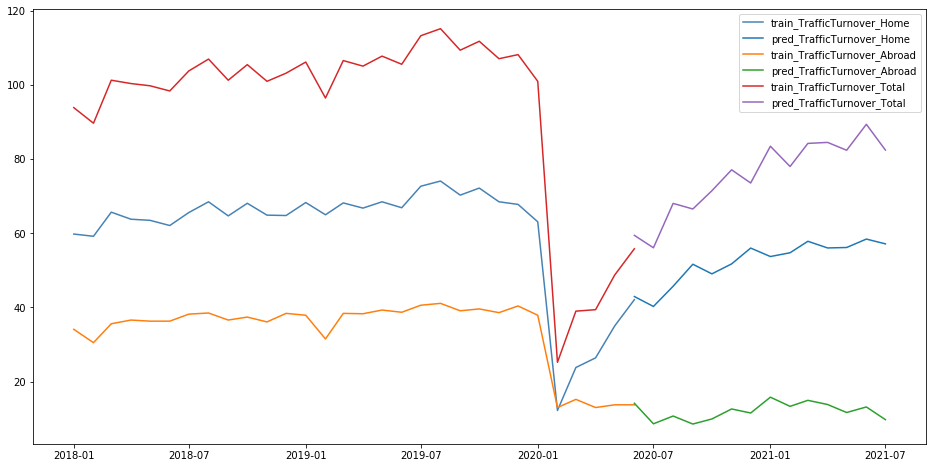

In [274]:
#Pred for traffic Turnover
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

# get the train data
train_TrafficTurnover_Home = macro['TrafficTurnover_Home']
train_TrafficTurnover_Abroad = macro['TrafficTurnover_Abroad']
train_TrafficTurnover_Total = macro['TrafficTurnover_Total']

import statsmodels.api as sm
 
# y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train_TrafficTurnover_Home, order=(4, 1, 4),seasonal_factor=(1,1,1,0)).fit()
y_hat_avg['pred_TrafficTurnover_Home'] = fit1.predict(start=29,end=42, dynamic=True)

fit2 = sm.tsa.statespace.SARIMAX(train_TrafficTurnover_Abroad, order=(4, 1, 4),seasonal_factor=(1,1,1,0)).fit()
y_hat_avg['pred_TrafficTurnover_Abroad'] = fit2.predict(start=29,end=42, dynamic=True)

fit3 = sm.tsa.statespace.SARIMAX(train_TrafficTurnover_Total, order=(4, 1, 4),seasonal_factor=(1,1,1,0)).fit()
y_hat_avg['pred_TrafficTurnover_Total'] = fit3.predict(start=29,end=42, dynamic=True)



#plot the prediction
plt.figure(figsize=(16, 8))
plt.plot(train_TrafficTurnover_Home, label='train_TrafficTurnover_Home',color='steelblue')
plt.plot(y_hat_avg['pred_TrafficTurnover_Home'], label='pred_TrafficTurnover_Home')

plt.plot(train_TrafficTurnover_Abroad, label='train_TrafficTurnover_Abroad')
plt.plot(y_hat_avg['pred_TrafficTurnover_Abroad'], label='pred_TrafficTurnover_Abroad')

plt.plot(train_TrafficTurnover_Total, label='train_TrafficTurnover_Total')
plt.plot(y_hat_avg['pred_TrafficTurnover_Total'], label='pred_TrafficTurnover_Total')

plt.legend(loc='best')
plt.show()

## run the prediction for each variable

y_hat_avg['SARIMA']

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


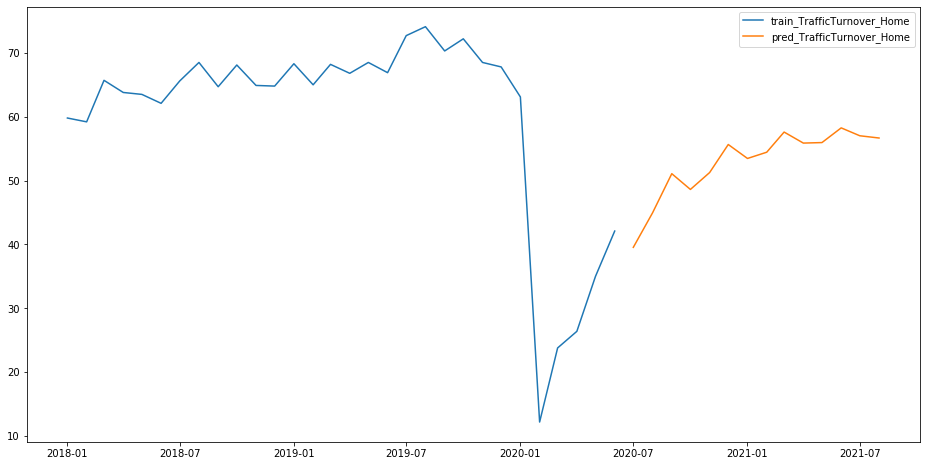

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


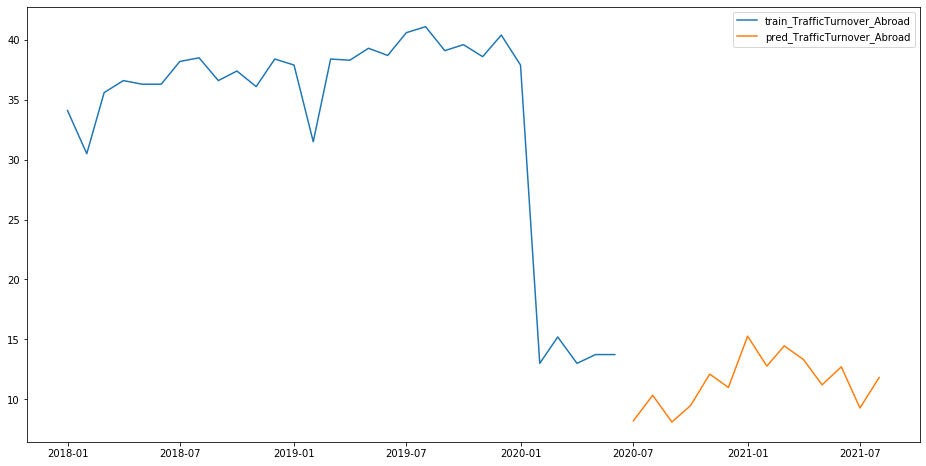

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


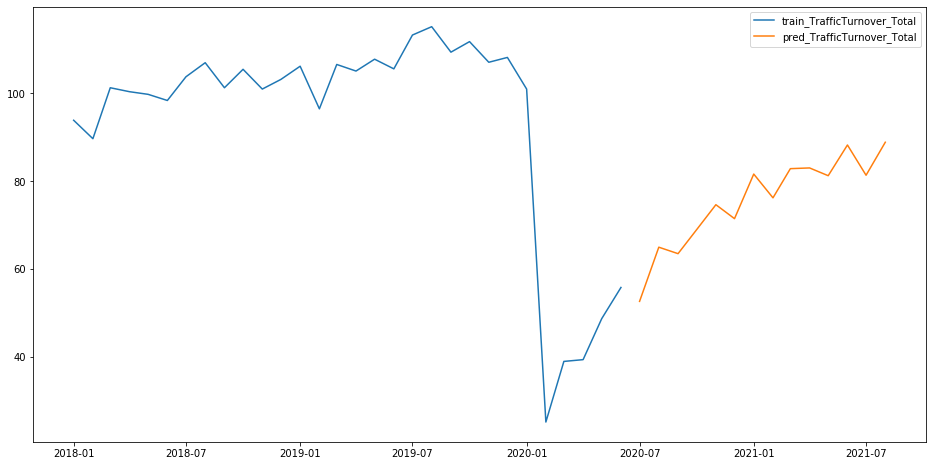

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


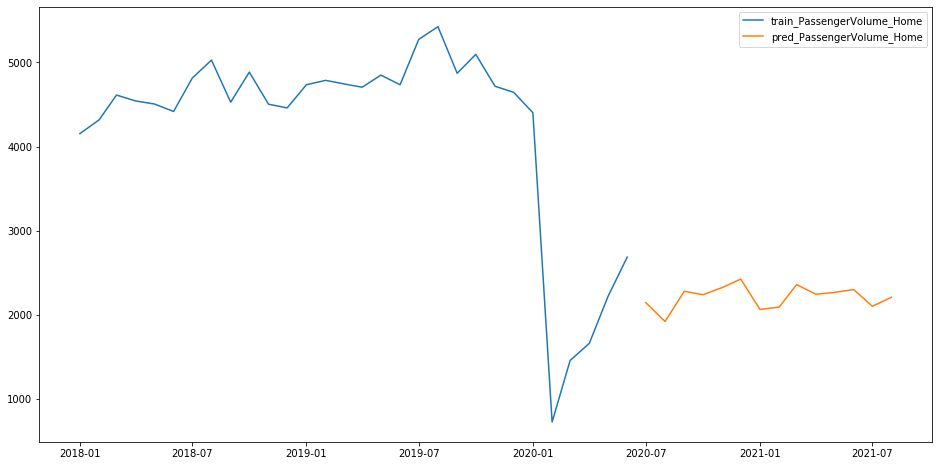

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


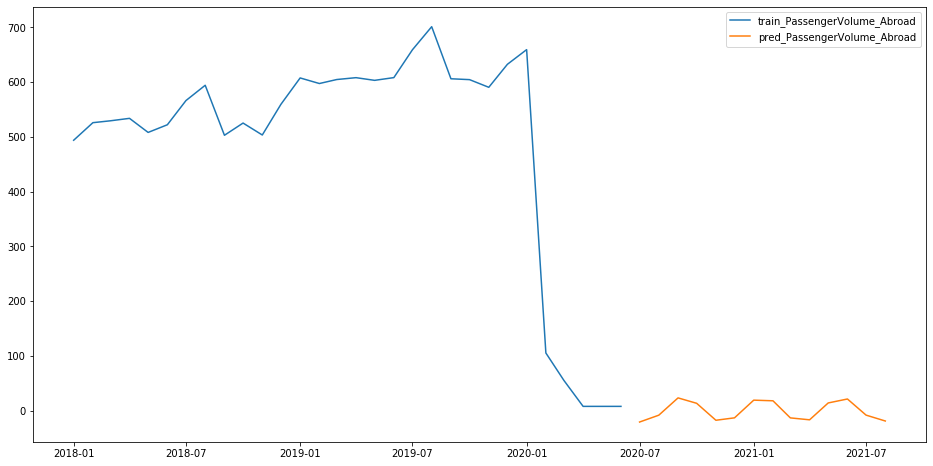

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


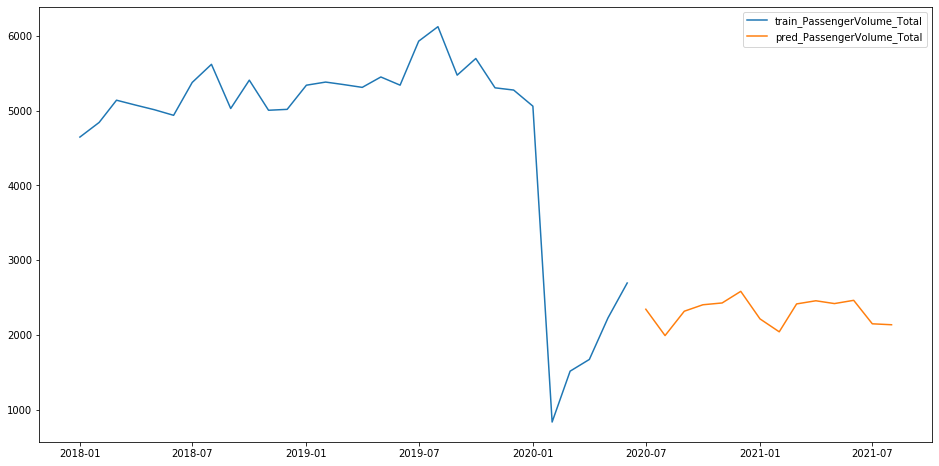

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


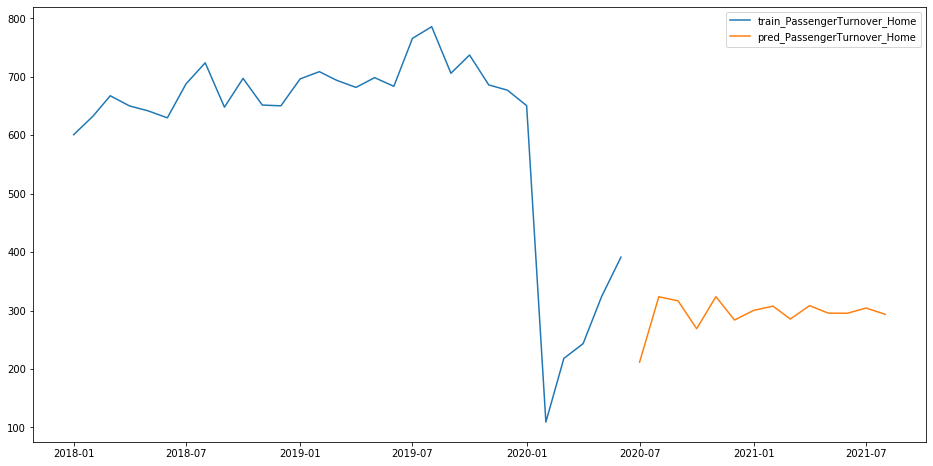

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


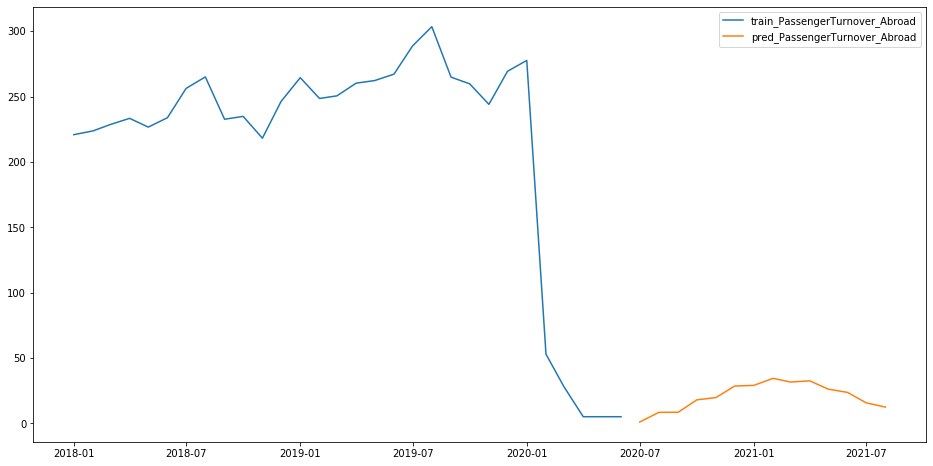

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


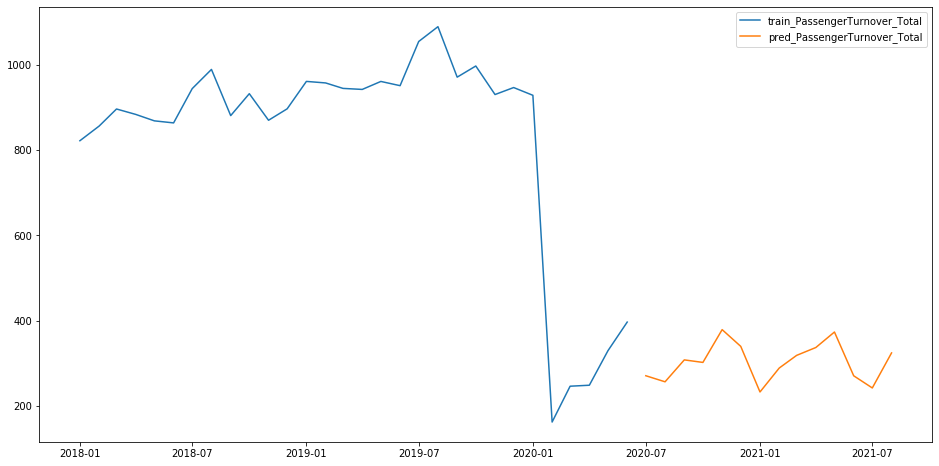

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


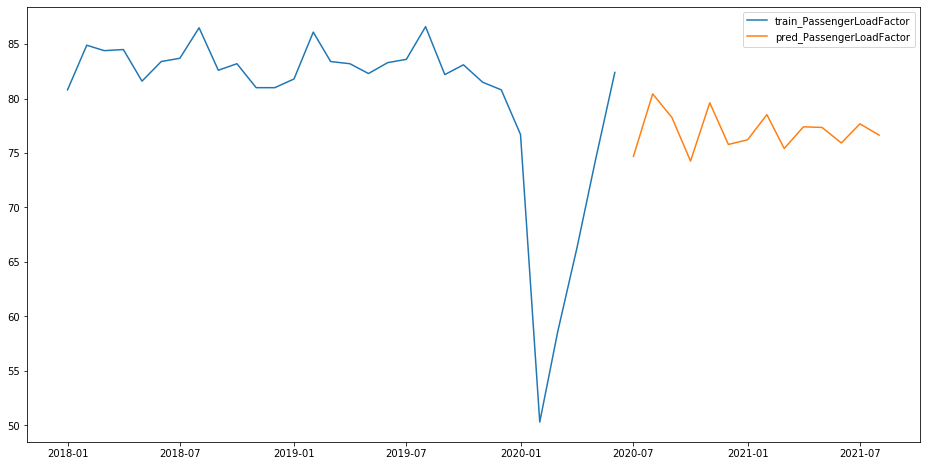

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


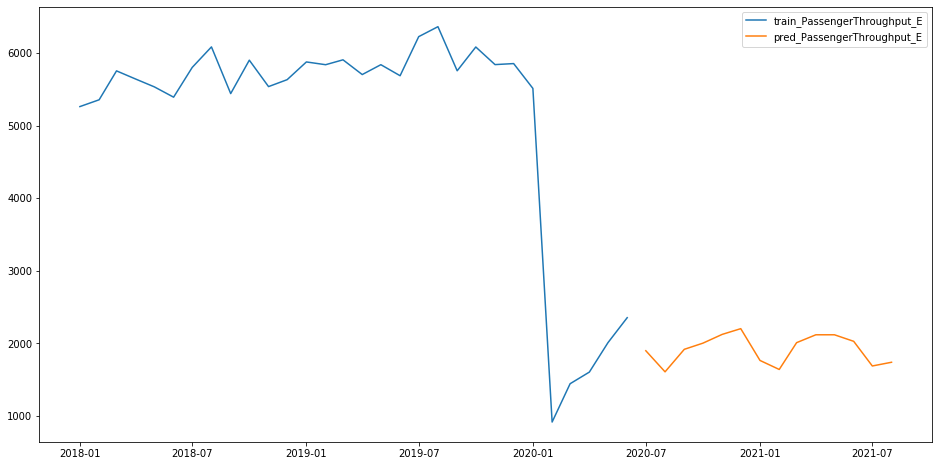

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


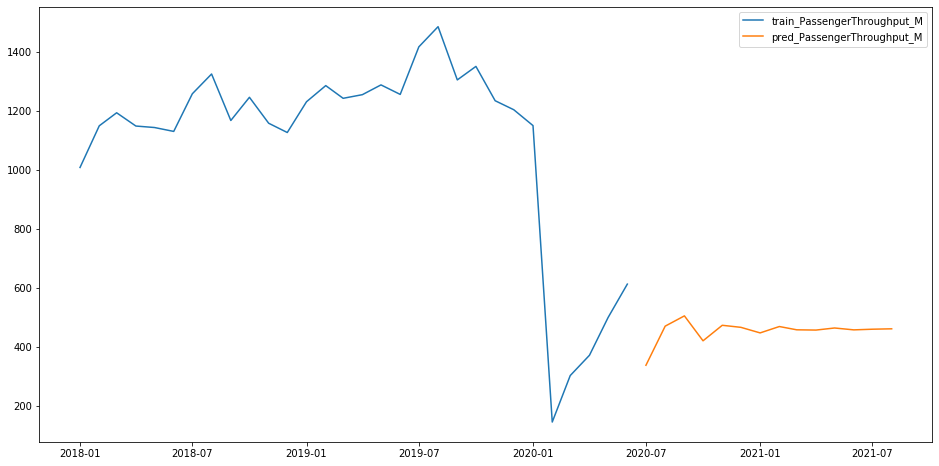

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


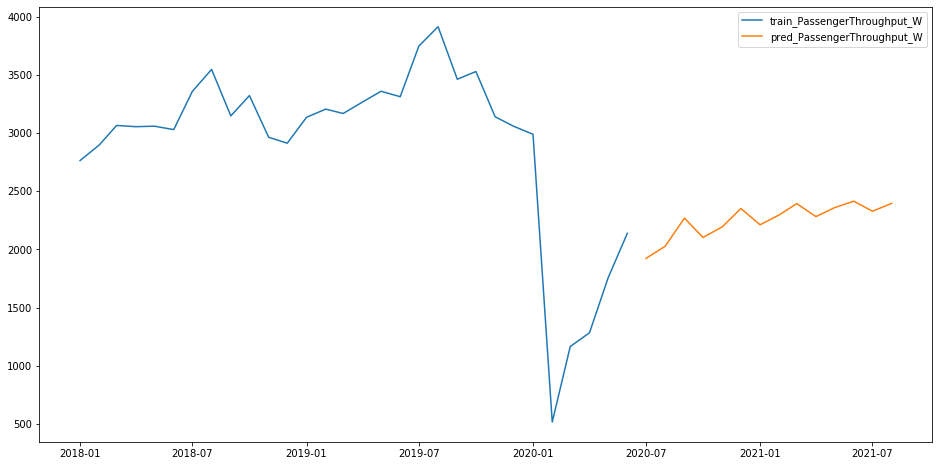

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


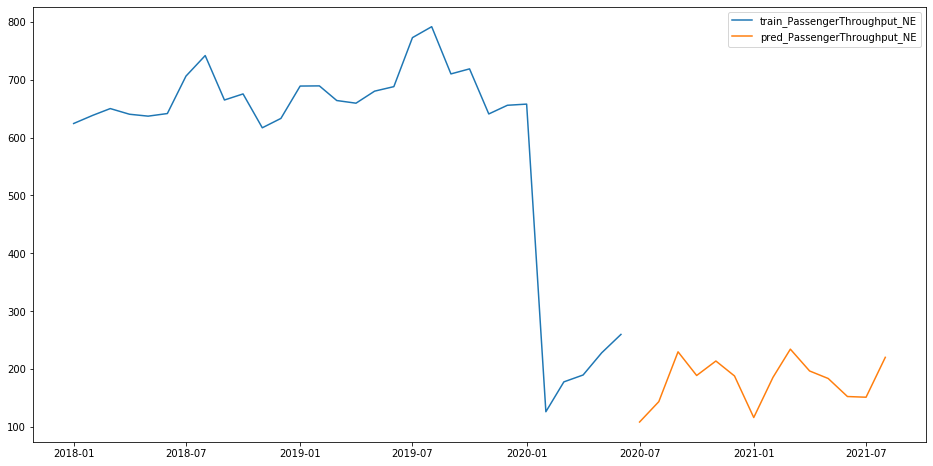

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


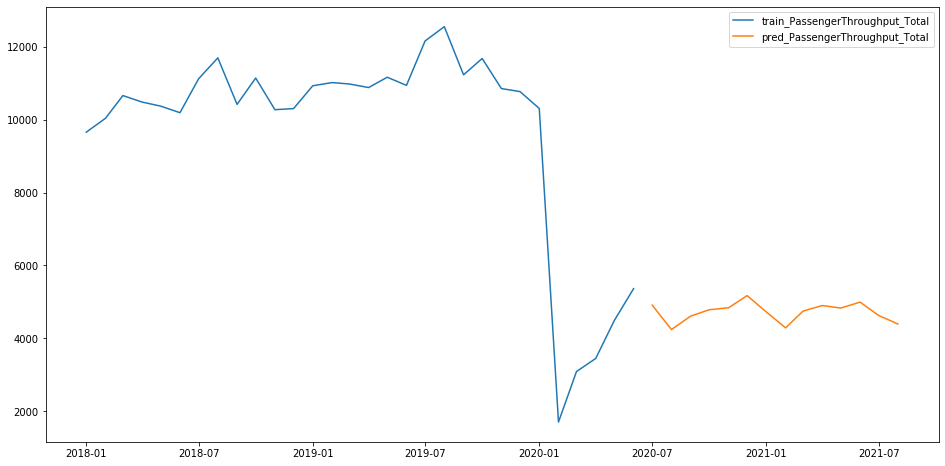

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


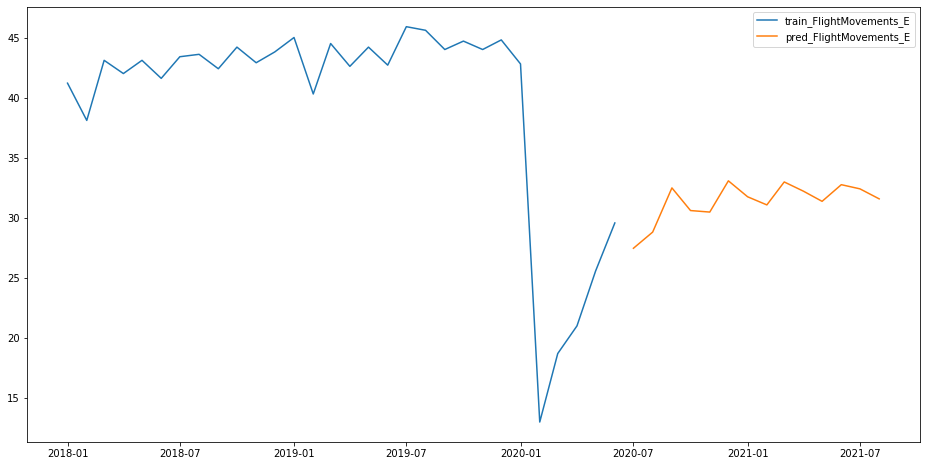

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


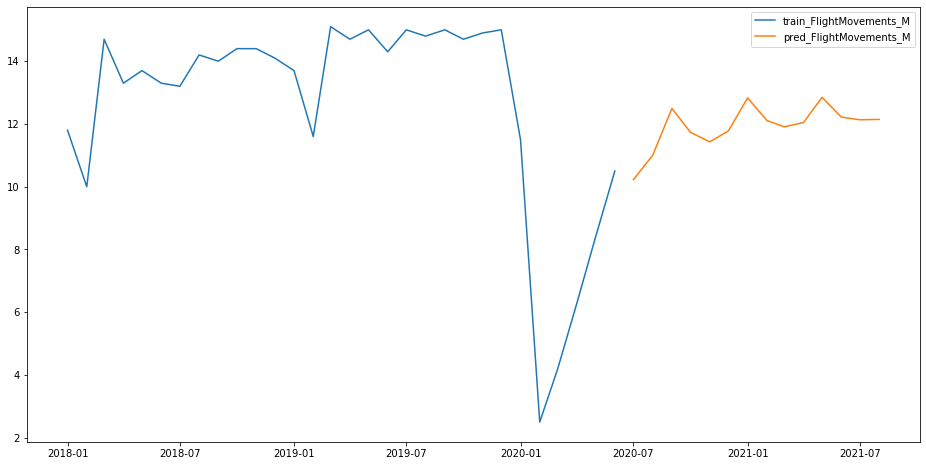

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


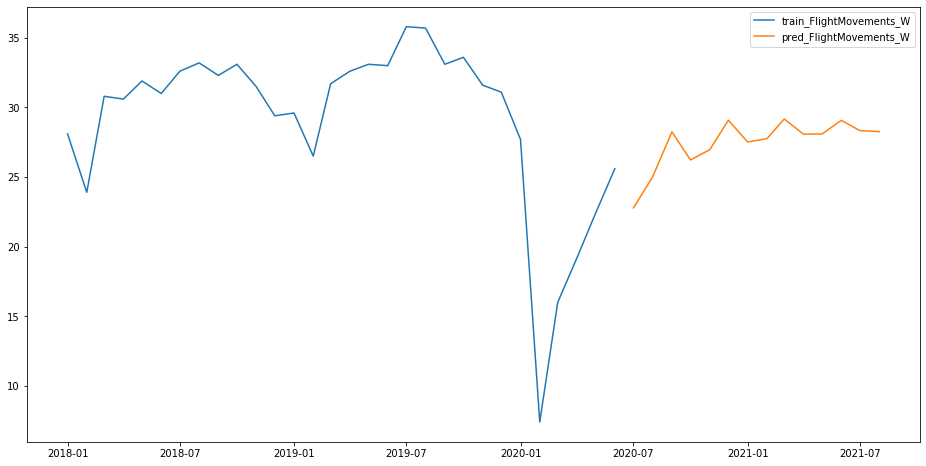

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


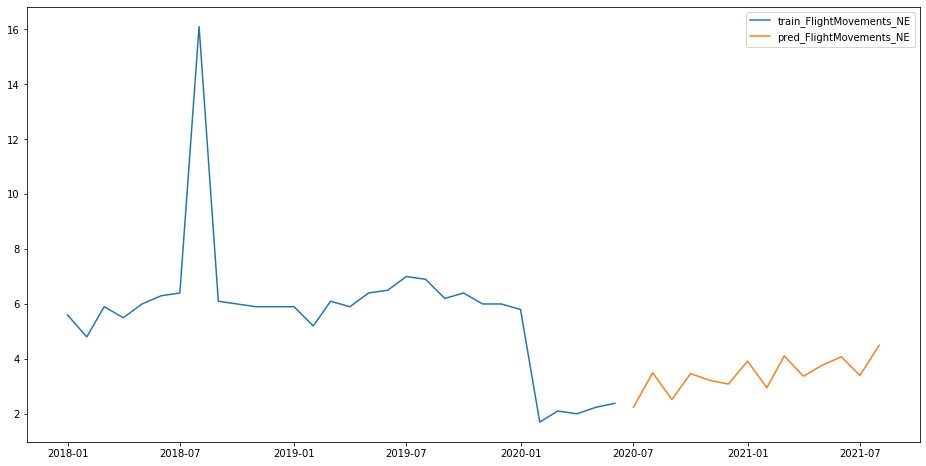

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


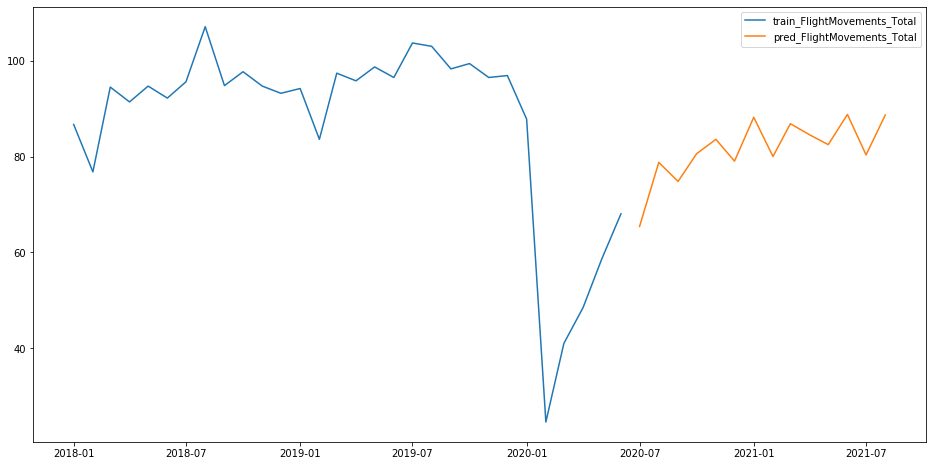

In [275]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
y_hat_avg = train

for i in macro.columns.tolist():
    train = macro[i]
    fit1 = sm.tsa.statespace.SARIMAX(train, order=(4, 1 , 4)).fit()
    y_hat_avg['pred_'+i] = fit1.predict(start=30,end=43, dynamic=True)

    plt.figure(figsize=(16, 8))
    plt.plot(train, label='train_'+i)
    plt.plot(y_hat_avg['pred_'+i], label='pred_'+i)
    plt.legend(loc='best')
    plt.show()

In [236]:
df.columns.tolist()

['TrafficTurnover_Home',
 'TrafficTurnover_Abroad',
 'TrafficTurnover_Total',
 'PassengerVolume_Home',
 'PassengerVolume_Abroad',
 'PassengerVolume_Total',
 'PassengerTurnover_Home',
 'PassengerTurnover_Abroad',
 'PassengerTurnover_Total',
 'PassengerLoadFactor',
 'PassengerThroughput_E',
 'PassengerThroughput_M',
 'PassengerThroughput_W',
 'PassengerThroughput_NE',
 'PassengerThroughput_Total',
 'FlightMovements_E',
 'FlightMovements_M',
 'FlightMovements_W',
 'FlightMovements_NE',
 'FlightMovements_Total']

# Predict Airchina

In [116]:
airchina = pd.read_excel('/Users/xiangyujie/Desktop/pwc/Airchina.xlsx',index_col=0,parse_dates=[0])
airchina.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2018-01-01 to 2020-06-01
Data columns (total 9 columns):
ASK_Home                   30 non-null float64
ASK_Abroad                 30 non-null float64
ASK_Total                  30 non-null float64
Passenger_Volume_Home      30 non-null float64
Passenger_Volume_Abroad    30 non-null float64
Passenger_Volume_Total     30 non-null float64
Load_Factor_Home           30 non-null float64
Load_Factor_Abroad         30 non-null float64
Load_Factor_Total          30 non-null float64
dtypes: float64(9)
memory usage: 2.3 KB


## ASK_Home quick peak

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No freque

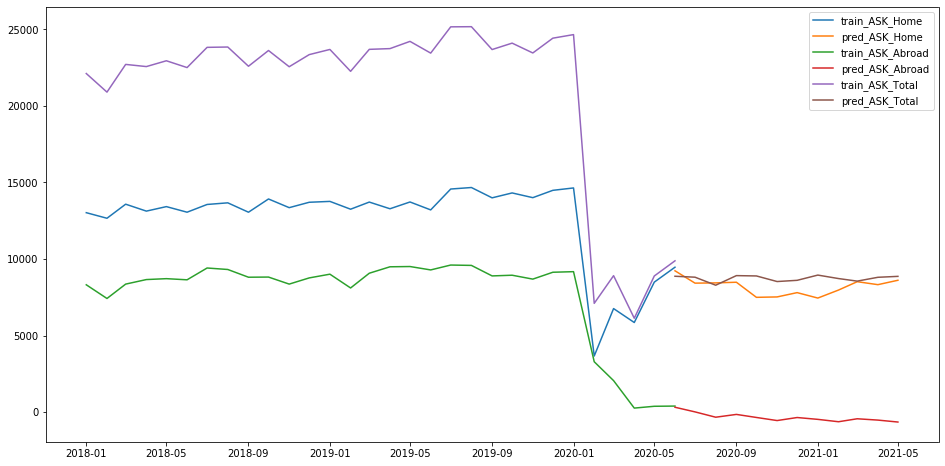

In [117]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

train_ASK_Home = airchina['ASK_Home']
train_ASK_Abroad = airchina['ASK_Abroad']
train_ASK_Total = airchina['ASK_Total']

import statsmodels.api as sm

fit1 = sm.tsa.statespace.SARIMAX(train_ASK_Home, order=(4, 1, 4),seasonal_factor=(0,1,0,12)).fit()
y_hat_avg['pred_ASK_Home'] = fit1.predict(start=29,end=40, dynamic=True)

fit2 = sm.tsa.statespace.SARIMAX(train_ASK_Abroad, order=(4, 1, 4),seasonal_factor=(0,1,0,12)).fit()
y_hat_avg['pred_ASK_Abroad'] = fit2.predict(start=29,end=40, dynamic=True)

fit3 = sm.tsa.statespace.SARIMAX(train_ASK_Total, order=(4, 1, 4),seasonal_factor=(0,1,0,12)).fit()
y_hat_avg['pred_ASK_Total'] = fit3.predict(start=29,end=40, dynamic=True)


plt.figure(figsize=(16, 8))
plt.plot(train_ASK_Home, label='train_ASK_Home')
plt.plot(y_hat_avg['pred_ASK_Home'], label='pred_ASK_Home')

plt.plot(train_ASK_Abroad, label='train_ASK_Abroad')
# plt.plot(test, label='Test')
plt.plot(y_hat_avg['pred_ASK_Abroad'], label='pred_ASK_Abroad')

plt.plot(train_ASK_Total, label='train_ASK_Total')
# plt.plot(test, label='Test')
plt.plot(y_hat_avg['pred_ASK_Total'], label='pred_ASK_Total')

plt.legend(loc='best')
plt.show()

## run for each variable

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


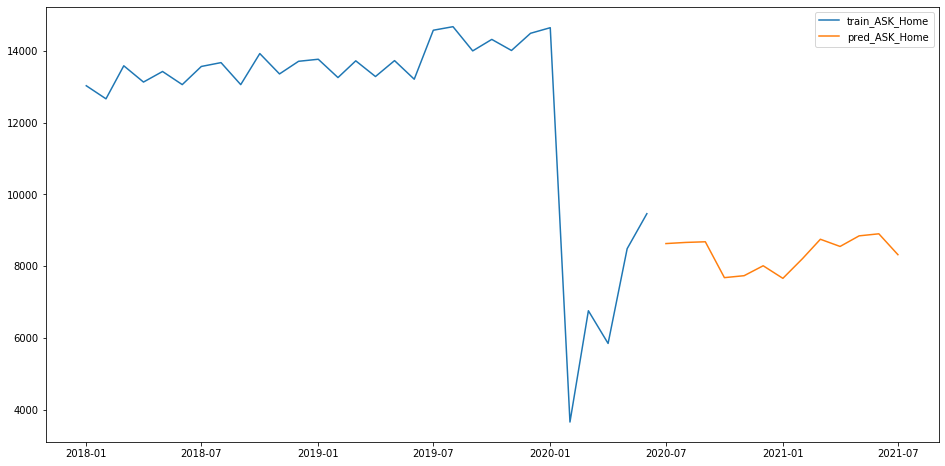

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


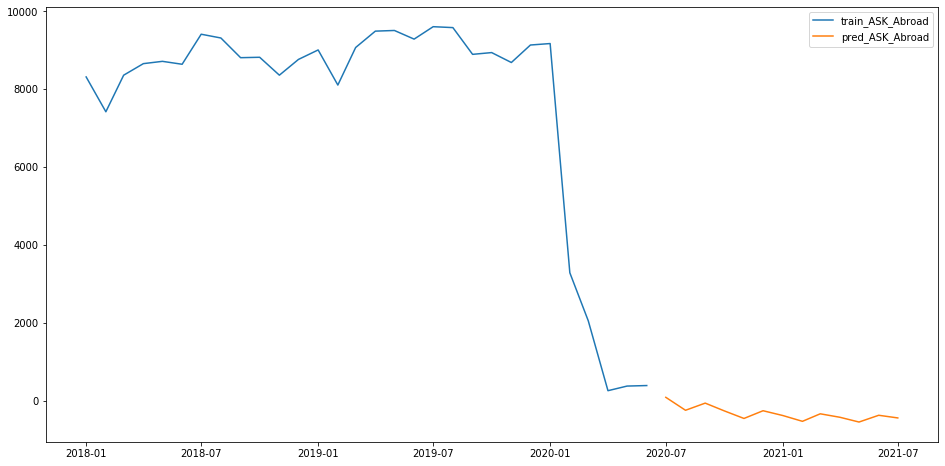

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


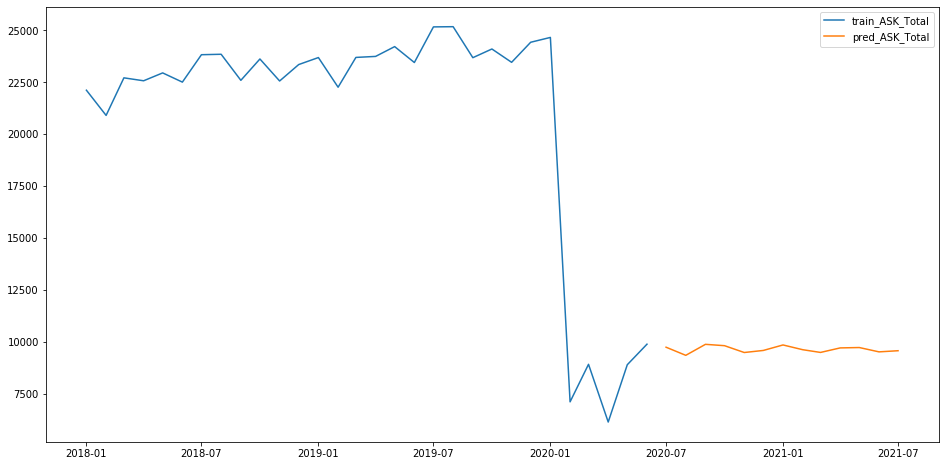

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


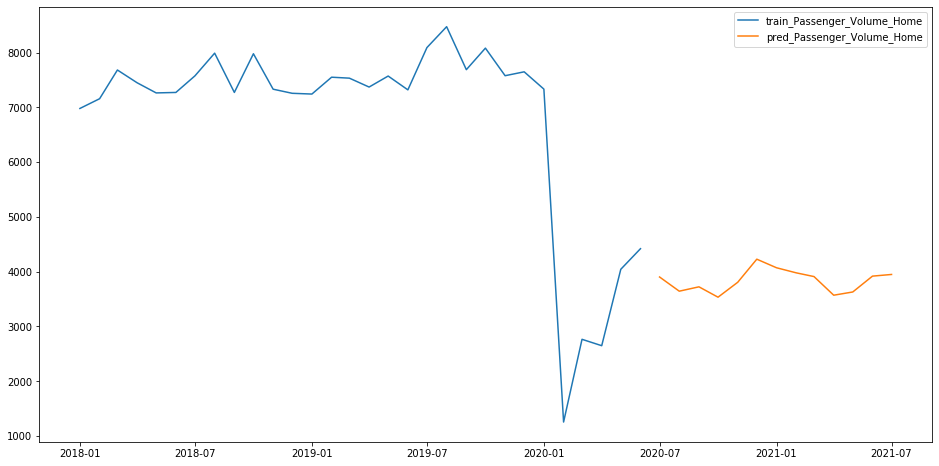

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


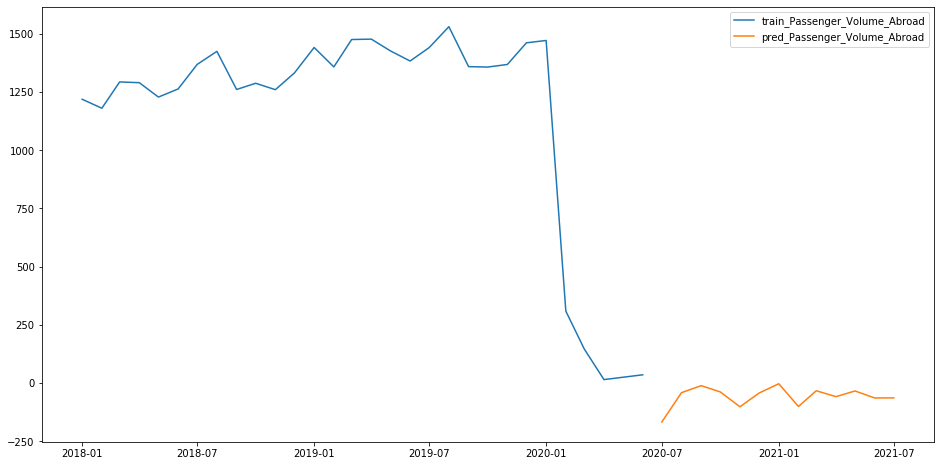

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


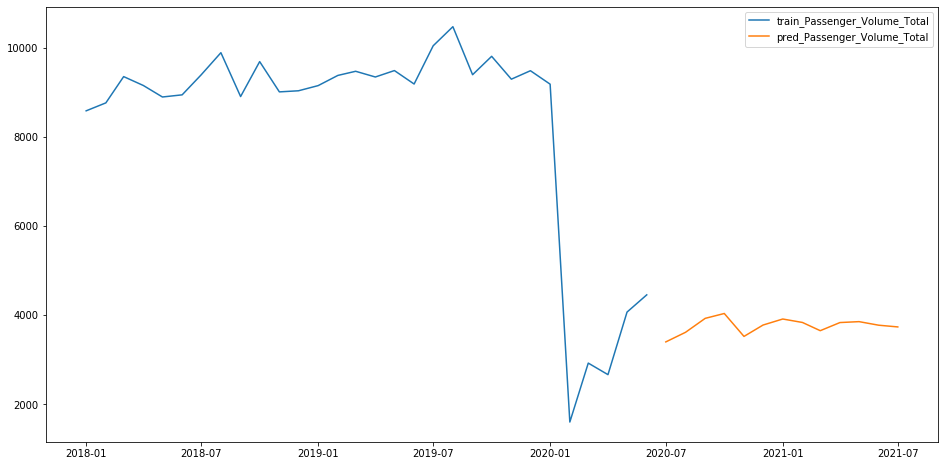

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


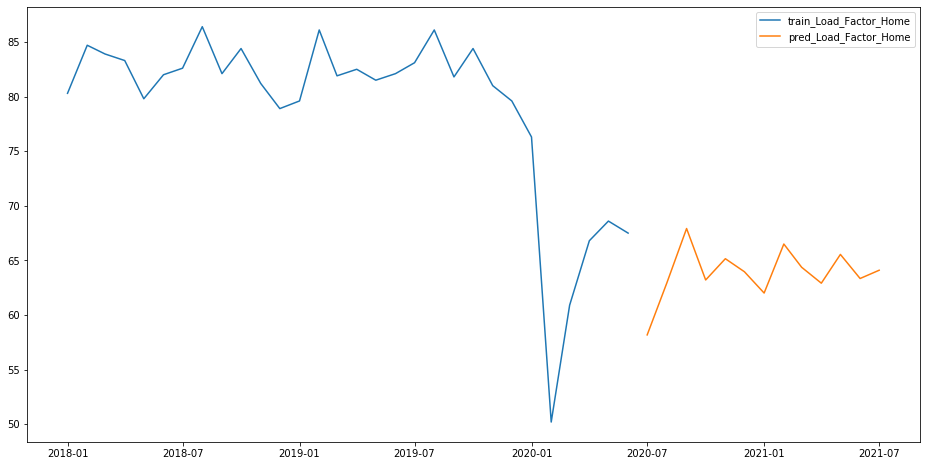

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


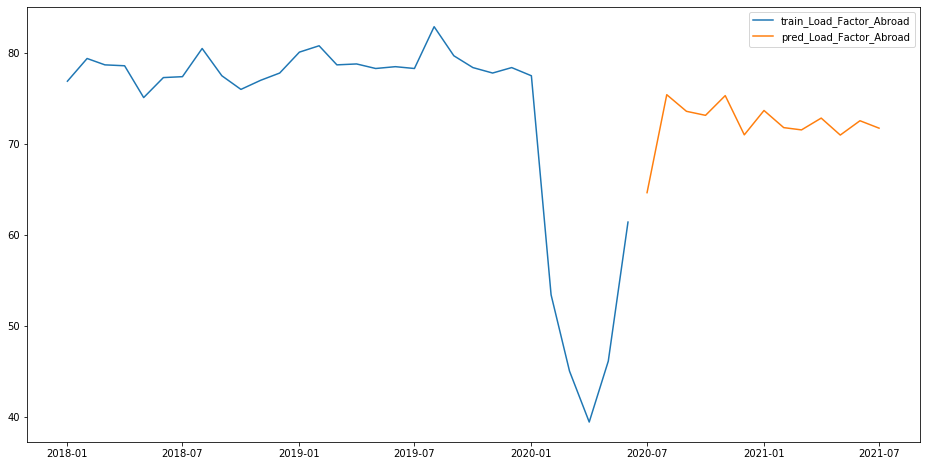

/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/xiangyujie/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


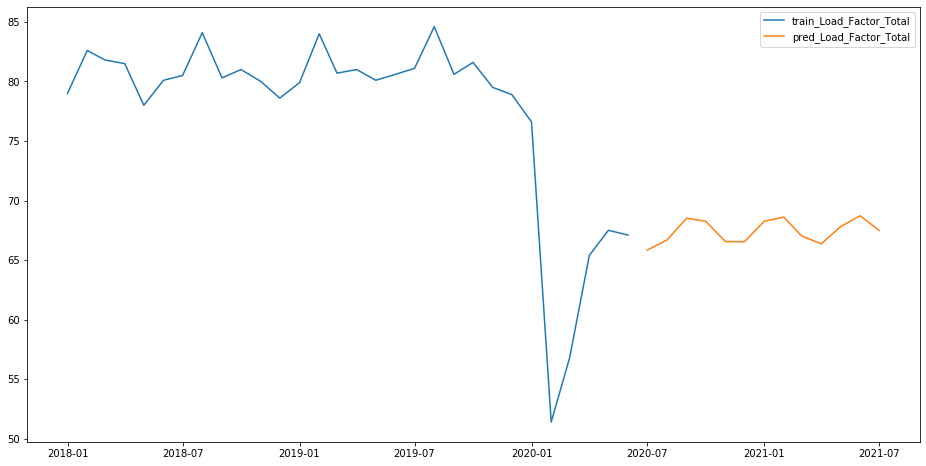

In [120]:
for i in airchina.columns.tolist():
    train = airchina[i]
    fit1 = sm.tsa.statespace.SARIMAX(train, order=(4, 1 , 4),seasonal_factor=(0,1,0,12)).fit()
    y_hat_avg['pred_'+i] = fit1.predict(start=30,end=42, dynamic=True)

    plt.figure(figsize=(16, 8))
    plt.plot(train, label='train_'+i)
    plt.plot(y_hat_avg['pred_'+i], label='pred_'+i)
    plt.legend(loc='best')
    plt.show()

## Get the predicted data for each variabla

In [134]:
for i in range(49,58):
    print(pd.DataFrame(y_hat_avg).iat[i, 0])

2020-07-01    8629.794398
2020-08-01    8661.458475
2020-09-01    8679.635947
2020-10-01    7681.141408
2020-11-01    7735.392600
2020-12-01    8011.899945
2021-01-01    7661.634590
2021-02-01    8212.525276
2021-03-01    8749.857757
2021-04-01    8549.618006
2021-05-01    8844.746224
2021-06-01    8901.675639
2021-07-01    8320.495051
Freq: MS, dtype: float64
2020-07-01     87.532849
2020-08-01   -244.966940
2020-09-01    -61.196493
2020-10-01   -260.408438
2020-11-01   -454.911014
2020-12-01   -256.799994
2021-01-01   -379.288155
2021-02-01   -528.600382
2021-03-01   -335.642245
2021-04-01   -424.780672
2021-05-01   -546.787376
2021-06-01   -373.243093
2021-07-01   -441.444980
Freq: MS, dtype: float64
2020-07-01    9733.441560
2020-08-01    9341.869048
2020-09-01    9871.941047
2020-10-01    9806.712186
2020-11-01    9478.041698
2020-12-01    9576.944408
2021-01-01    9841.851199
2021-02-01    9613.189126
2021-03-01    9481.552462
2021-04-01    9699.635044
2021-05-01    9717.681795
2